# Two coupled spins Part 2: the total $S^2$

The coupling of spins is a key to understand atomic physics. An example is the coupling between the electron and proton spin in hydrogen which gives the famous 21 cm line used in astronomy. 

Here we will consider precisely such a coupling of two spin 1/2 systems. We are interested in the total spin ${\bf S}={\bf S}_1+{\bf S}_2$. In the first part we considered the $z$-component $S_z$ and here in the second part we will its square, $S^2$. 

**Learning goal:** These exercises will allow you to build and test your intuition of two coupled spin 1/2 systems. In particular, you will (hopefully) be able to determine what happens to a coupled spin state after a measurement of $S^2$.


**Notation:** We use the notation of Griffiths and Schröeter where $|\uparrow\rangle$ is the state $|s,m\rangle=|1/2,1/2\rangle$ and $|\downarrow\rangle=|1/2,-1/2\rangle$.

**Setup:** Throughout this exercise we will think of each qubit as a spin 1/2 system and we will identify the state $|0\rangle$ with $|\downarrow\rangle$ and the state $|1\rangle$ with $|\uparrow\rangle$. If we measure the operator $M$ on a qubit and find '0' ('1') the intrepretaion therefore is that we have measured the $z$-component of the first (second) spin 1/2 system and found the value $-\hbar/2$ ($\hbar/2$). In other words a measurement of $M$, on the first qubit say, corresponds to a measurement of $S_{1z}$.


In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

**Recomendation:** The coupling of spin can be quite tricky, so why not have your book open on the relevant side. If you have Griffiths and Schröeter (3rd edition) see section 4.4.1.

**Measurement of $S^2$**

As we have seen in part 1 the two states 
\begin{equation}
|\psi_+\rangle = \frac{1}{\sqrt{2}}\big(|\uparrow\downarrow\rangle+| \downarrow\uparrow\rangle\big) \ .
\end{equation}

and 

\begin{equation}
|\psi_-\rangle = \frac{1}{\sqrt{2}}\big(|\uparrow\downarrow\rangle-| \downarrow\uparrow\rangle\big) \ .
\end{equation}


are both eigenstates of $S_z$ with eigenvalue $0\hbar$. In fact they are also eigenstates of $S^2$, but the corresponding eigenvalues are different!

To see this let's do an experiment! To set it up note that we already use the first two qubits to measure $S_z$, we need to find a new way to measure $S^2$ as well. 


**How we will do measure $S^2$:**

First, note that the possible outcome of a measurement of $S^2$ for two coupled spin 1/2 systems is either $0\hbar^2$ (the eigenvalue of $S^2$ is $\hbar^2s(s+1)$ and here the total $s$ quantum number 0) or $2\hbar^2$ ($s=1$). 

As there are two possible outcomes of $S^2$ we will add a third qubit to the system and use this to measure the value of $S^2$. If the value of a measurement of $M$ on the third qubit is $0$ then the measured value of $S^2$ on the first two q-bits is $0\hbar^2$. Likevise if the value measured on the third qubit is $1$ then we have measured the value $2\hbar^2$ of $S^2$ on the first two qubits.  

Clearly the additional third qubit must be coupled to the first two qubits in order to make this come true! How does one realize this coupling? Well, it is a bit intricate and we will not go into the details here but merly use the experiment to understand what happens when we perform measurements of $S^2$. (If you are currious how it works just ask and we can set up a session to discuss it!)

As stated above  $|\psi_+\rangle$ and $|\psi_-\rangle$ are both eigenstates of $S^2$. To gain some familiarity with the new setup, let's check this with the experiment below. We start with  $|\psi_+\rangle$.

**Note:** The circut is a bit involved, but note that you do not need to understand the details of the experiment for this exercise. What we are after is the outcome of the experiment!


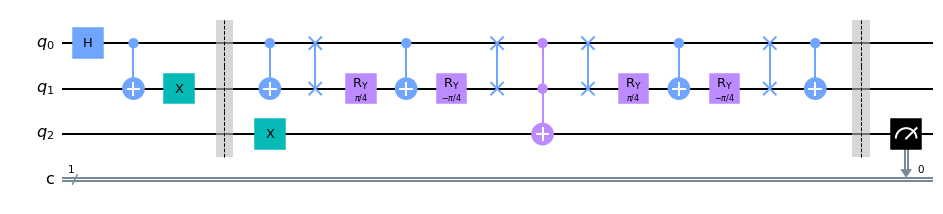

In [7]:
from math import pi
qc = QuantumCircuit(3,1)
qc.h(0) # This and the next two lines puts the first two q-bits in the state psi_+
qc.cx(0,1)
qc.x(1)
#qc.z(1) # To run the experiment with psi_- simply remove the '#' at the start of this line and run again
qc.barrier()
qc.cx(0,1) # the lines down to the next barrier couples the third q-bit to the first in the desired manner
qc.x(2)
qc.swap(0,1)
qc.ry(pi/4,1)
qc.cx(0,1)
qc.ry(-pi/4,1)
qc.swap(0,1)
qc.ccx(0,1,2)
qc.swap(0,1)
qc.ry(pi/4,1)
qc.cx(0,1)
qc.ry(-pi/4,1)
qc.swap(0,1)
qc.cx(0,1)
qc.barrier()
qc.measure(2,0) # this measures the value of $S^2$ on the first two q-bits
qc.draw()

In [8]:
simulator = Aer.get_backend('qasm_simulator')

result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


Recall that the result '1' implies that $s=1$, ie. we have measured $S^2$ and found the value $2\hbar^2$. Why do we get the same result every time? Well $|\psi_+\rangle$ is an eigenstate of $S^2$ so we are bound to get the associated eigenvalue $2\hbar^2$ when we measure $S^2$. 

**Exercise 1:** Remove the '#' in the 6th line of the code above to set up the state $|\psi_-\rangle$. Run the experiment and explain the outcome. (Recall, when we get the result '0' we have $s=0$ and hence have measured $S^2$ and found  the value $0\hbar^2$.)

**Summary this far:** As we have just seen the states $|\psi\pm\rangle$ are both eigenstates of $S_z$ with eigenvalue $0\hbar$. The are also both eigenstates of ${\bf S}^2$ but the eigenvalue depends on the sign in $|\psi\pm\rangle$!  

To understand better what is going on let's examine what happens if we only use the $|\uparrow\downarrow\rangle$ part of the state. One great thing about these experiments is that we can simply give it a try!

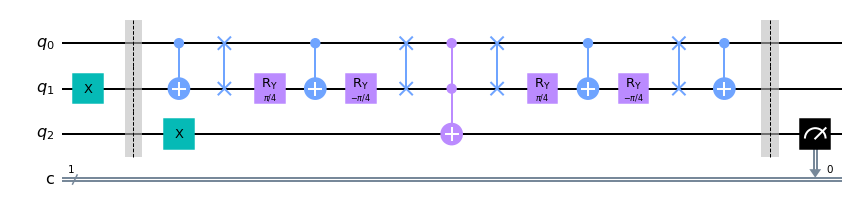

In [9]:
from math import pi
qc = QuantumCircuit(3,1)
#qc.x(0) # This is the line we need for the final exercise below. 
qc.x(1) # This puts the first two q-bits in the state |up down>
qc.barrier()
qc.cx(0,1) # the lines down to the next barrier couples the third q-bit to the first in the desired manner
qc.x(2)
qc.swap(0,1)
qc.ry(pi/4,1)
qc.cx(0,1)
qc.ry(-pi/4,1)
qc.swap(0,1)
qc.ccx(0,1,2)
qc.swap(0,1)
qc.ry(pi/4,1)
qc.cx(0,1)
qc.ry(-pi/4,1)
qc.swap(0,1)
qc.cx(0,1)
qc.barrier()
qc.measure(2,0) # this measures the value of $S^2$ on the first two q-bits
qc.draw()

In [10]:
simulator = Aer.get_backend('qasm_simulator')

result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['0', '0', '0', '1', '0', '1', '0', '0', '0', '1']


As we can see, if the system is in the state $|\uparrow\downarrow\rangle$, then sometimes the result of the measuremet of $S^2$ is $0\hbar^2$ and sometimes it is $2\hbar^2$. 

**Exercise 2:** This result shows that the state $|\uparrow\downarrow\rangle$ is <b> not </b> an eigenstate of the square of the total spin $S^2$. Explain how we can see this from the result.

**Exercise 3:** Determine the probability that the measurement will give respectively $0\hbar^2$ and $2\hbar^2$. 

Now let's try to understand what happens to the state $|\uparrow\downarrow\rangle$ when we measure the square of the total spin $S^2$.

**Exercise 4/ Your prediction:** What is the state of the first two qubits after the measurement os $S^2$?

To test it, let's first measure $S^2$ and subsequantly $S_{1z}$ and $S_{2z}$.

Here we go!

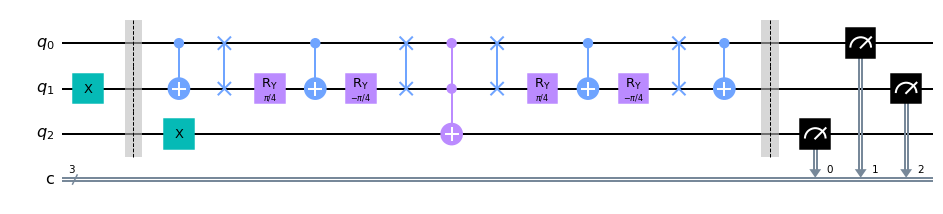

In [16]:
from math import pi
qc = QuantumCircuit(3,3)
#qc.x(0) # This is the line we need for the final exercise below. 
qc.x(1) # This puts the first two q-bits in the state |+->
qc.barrier()
qc.cx(0,1) # the lines down to the next barrier couples the third q-bit to the first in the desired manner
qc.x(2)
qc.swap(0,1)
qc.ry(pi/4,1)
qc.cx(0,1)
qc.ry(-pi/4,1)
qc.swap(0,1)
qc.ccx(0,1,2)
qc.swap(0,1)
qc.ry(pi/4,1)
qc.cx(0,1)
qc.ry(-pi/4,1)
qc.swap(0,1)
qc.cx(0,1)
qc.barrier()
qc.measure(2,0) # this measures the value of $S^2$ on the first two q-bits
qc.measure(0,1) # this measures S_z^{(1)}
qc.measure(1,2) # this measures S_z^{(2)}
qc.draw()

In [17]:
simulator = Aer.get_backend('qasm_simulator')

result = simulator.run(qc, shots=10, memory=True).result()
memory = result.get_memory(qc)
print(memory)

['101', '101', '011', '100', '010', '010', '011', '100', '010', '011']


**Here is how to read the result:** The rightmost digit tells us the measured value of $S^2$, the middle digit gives us the measured value of $S_{1z}$ and the leftmost digit the measured value of $S_{2z}$. For example, '011' tells us that the measurements gave $s=1$, $m_1=1/2$ and $m_2=-1/2$.


**Exercise 5:** Try to explain the outcome of the experiment above.

**Final exercise / prediction:** What would have changed (if anything) if we had instead prepared the first two qubits in the state $|\uparrow\uparrow\rangle$?

**Check:** To test your prediction simply remove the '#' in the third line of the code above and run the experiment again.

**Don't panic:** The first times you work with coupled spins it it likely to be quite confusing. So if you find this difficult rest assured that you are not alone in this!  

**Take home:** When we measure the total $S^2$ we perform a measurement on both qubits at the same time and the sign in the two states $|\psi_+\rangle$ and $|\psi_-\rangle$ is essential. With + it is an eigenstate of ${\bf S}^2$ with eigenvalue $2\hbar^2$ and with - it is an eigenstate of ${\bf S}^2$ with eigenvalue $0\hbar^2$.